## Libraries

In [2]:
import tensorflow as tf

import os 
from PIL import Image

import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

## Images 

Each image is a 28 by 28 grayscale image of a handwritten digit. 

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255

In [5]:
x_train.shape

(60000, 28, 28)

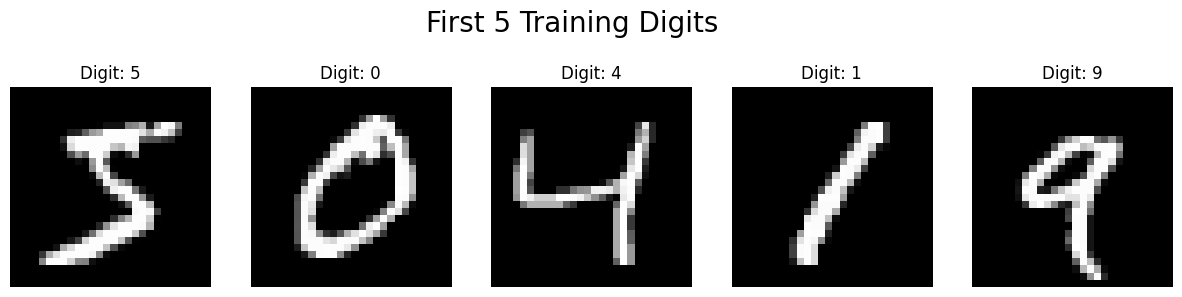

In [6]:
fig, ax = plt.subplots(figsize=(15, 5), ncols=5)
fig.suptitle('First 5 Training Digits', fontsize=20, y=0.85)
for i in range(5): 
    ax[i].set_axis_off()
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].set_title('Digit: ' + str(y_train[i]))
plt.show()

## Neural Network

My first model will be a simple sequential model with dense layers. 

In [98]:
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'), 
    tf.keras.layers.Dense(units=10) 
])

In [99]:
simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [100]:
history = simple_model.fit(x_train, y_train, batch_size=15, epochs=15, validation_split=0.1, verbose=2)

Epoch 1/15
3600/3600 - 12s - 3ms/step - accuracy: 0.9325 - loss: 0.2250 - val_accuracy: 0.9632 - val_loss: 0.1262
Epoch 2/15
3600/3600 - 20s - 6ms/step - accuracy: 0.9675 - loss: 0.1069 - val_accuracy: 0.9697 - val_loss: 0.0959
Epoch 3/15
3600/3600 - 19s - 5ms/step - accuracy: 0.9763 - loss: 0.0777 - val_accuracy: 0.9718 - val_loss: 0.0941
Epoch 4/15
3600/3600 - 21s - 6ms/step - accuracy: 0.9805 - loss: 0.0627 - val_accuracy: 0.9783 - val_loss: 0.0786
Epoch 5/15
3600/3600 - 14s - 4ms/step - accuracy: 0.9847 - loss: 0.0517 - val_accuracy: 0.9745 - val_loss: 0.0924
Epoch 6/15
3600/3600 - 13s - 4ms/step - accuracy: 0.9868 - loss: 0.0424 - val_accuracy: 0.9763 - val_loss: 0.0926
Epoch 7/15
3600/3600 - 13s - 4ms/step - accuracy: 0.9880 - loss: 0.0379 - val_accuracy: 0.9775 - val_loss: 0.0906
Epoch 8/15
3600/3600 - 13s - 4ms/step - accuracy: 0.9888 - loss: 0.0355 - val_accuracy: 0.9777 - val_loss: 0.0941
Epoch 9/15
3600/3600 - 12s - 3ms/step - accuracy: 0.9913 - loss: 0.0289 - val_accuracy: 

The training accuracy is higher than validaiton accuracy after around 3 epochs.

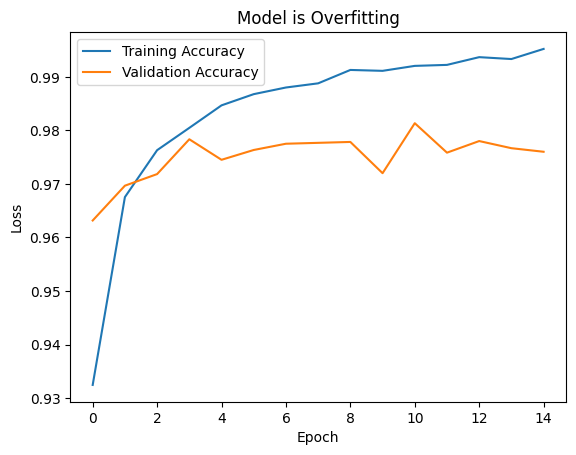

In [101]:
plt.title('Model is Overfitting')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Attempt 2

To help with overfitting, I am removeing units from dense layers, removing a dense layers, adding dropout layers, and decreasing the learning rate. I also altered the batch size and number of epochs to see what worked well. 

In [102]:
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10) 
])

simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [107]:
history = simple_model.fit(x_train, y_train, batch_size=10, epochs=20, validation_split=0.1, verbose=2)

Epoch 1/20
5400/5400 - 14s - 3ms/step - accuracy: 0.9583 - loss: 0.1371 - val_accuracy: 0.9793 - val_loss: 0.0745
Epoch 2/20
5400/5400 - 15s - 3ms/step - accuracy: 0.9610 - loss: 0.1291 - val_accuracy: 0.9775 - val_loss: 0.0762
Epoch 3/20
5400/5400 - 12s - 2ms/step - accuracy: 0.9624 - loss: 0.1213 - val_accuracy: 0.9807 - val_loss: 0.0728
Epoch 4/20
5400/5400 - 9s - 2ms/step - accuracy: 0.9654 - loss: 0.1150 - val_accuracy: 0.9790 - val_loss: 0.0705
Epoch 5/20
5400/5400 - 10s - 2ms/step - accuracy: 0.9676 - loss: 0.1065 - val_accuracy: 0.9788 - val_loss: 0.0708
Epoch 6/20
5400/5400 - 10s - 2ms/step - accuracy: 0.9680 - loss: 0.1039 - val_accuracy: 0.9795 - val_loss: 0.0702
Epoch 7/20
5400/5400 - 10s - 2ms/step - accuracy: 0.9689 - loss: 0.0998 - val_accuracy: 0.9792 - val_loss: 0.0691
Epoch 8/20
5400/5400 - 11s - 2ms/step - accuracy: 0.9698 - loss: 0.0957 - val_accuracy: 0.9802 - val_loss: 0.0702
Epoch 9/20
5400/5400 - 13s - 2ms/step - accuracy: 0.9720 - loss: 0.0909 - val_accuracy: 0

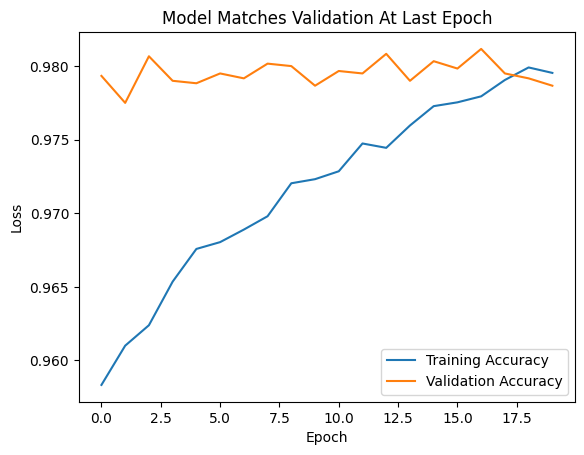

In [108]:
plt.title('Model Matches Validation At Last Epoch')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing the Model

Fitting on all data and evaluatin with test data.

In [37]:
simple_model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=32, activation='relu'), 
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=10) 
])
simple_model.summary()

simple_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,650 (205.66 KB)

 Trainable params: 52,650 (205.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
simple_model.fit(x_train, y_train, batch_size=10, epochs=23, verbose=2)

Final acuracy around 97.5%

In [135]:
predictions = tf.nn.softmax(simple_model.predict(x_test_expanded)).numpy().argmax(axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 813us/step


In [136]:
print('Accuracy:', accuracy_score(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions)


Accuracy: 0.9769


We can also see from the confusion matrix that the model is mistaking 4s for 9s and 3s for 5s

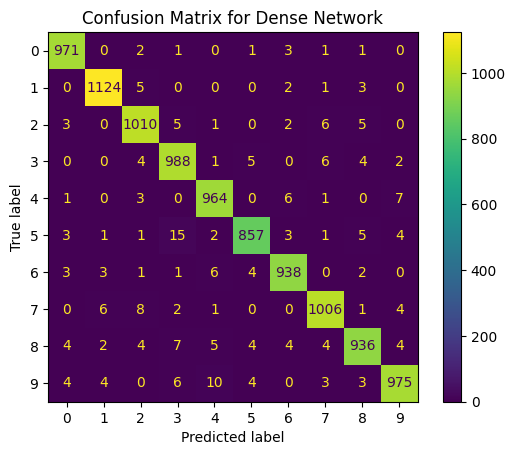

In [138]:
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Dense Network')
plt.show()

## Convolutional Neural Network

We are going to create a new model with convolution layers to pick up on patterns in the images better. For a convolutoin layer, we need to add a dimention for channels. In this case there is only one channel since the images are grayscale. 

In [7]:
x_train_expanded = np.expand_dims(x_train, axis=-1)
x_test_expanded = np.expand_dims(x_test, axis=-1)



In [25]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=7, kernel_size=(5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=10)
])

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 28, 28, 7)           │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 14, 14, 7)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 14, 14, 5)           │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 7, 7, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 245)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          31,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,152 (160.75 KB)

 Trainable params: 41,024 (160.25 KB)

 Non-trainable params: 128 (512.00 B)

In [26]:
conv_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

In [27]:
history = conv_model.fit(x_train_expanded, y_train, batch_size=10, epochs=22, validation_split=0.1, verbose=2)

Epoch 1/22
5400/5400 - 33s - 6ms/step - accuracy: 0.8284 - loss: 0.5801 - val_accuracy: 0.9603 - val_loss: 0.1334
Epoch 2/22
5400/5400 - 37s - 7ms/step - accuracy: 0.9397 - loss: 0.2067 - val_accuracy: 0.9775 - val_loss: 0.0835
Epoch 3/22
5400/5400 - 36s - 7ms/step - accuracy: 0.9566 - loss: 0.1464 - val_accuracy: 0.9792 - val_loss: 0.0716
Epoch 4/22
5400/5400 - 36s - 7ms/step - accuracy: 0.9648 - loss: 0.1195 - val_accuracy: 0.9837 - val_loss: 0.0583
Epoch 5/22
5400/5400 - 38s - 7ms/step - accuracy: 0.9694 - loss: 0.1029 - val_accuracy: 0.9838 - val_loss: 0.0555
Epoch 6/22
5400/5400 - 35s - 6ms/step - accuracy: 0.9727 - loss: 0.0908 - val_accuracy: 0.9825 - val_loss: 0.0592
Epoch 7/22
5400/5400 - 33s - 6ms/step - accuracy: 0.9746 - loss: 0.0821 - val_accuracy: 0.9850 - val_loss: 0.0562
Epoch 8/22
5400/5400 - 39s - 7ms/step - accuracy: 0.9780 - loss: 0.0750 - val_accuracy: 0.9857 - val_loss: 0.0513
Epoch 9/22
5400/5400 - 38s - 7ms/step - accuracy: 0.9789 - loss: 0.0685 - val_accuracy: 

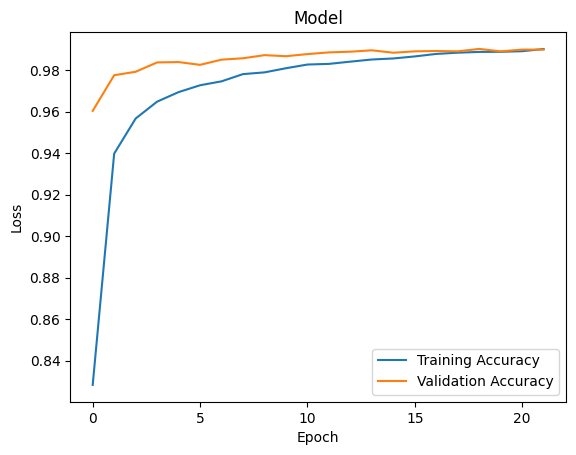

In [29]:
plt.title('Model Matches Validation Well')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing

I will train on all the data and evaluate the accuracy from the test data.

In [47]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(filters=7, kernel_size=(5, 5), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=5, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(units=10)
])
conv_model.summary()

conv_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='True'),
    metrics=['accuracy']
)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 7)           │             182 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 14, 14, 7)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 5)           │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 7, 7, 5)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 245)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │          31,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,152 (160.75 KB)

 Trainable params: 41,024 (160.25 KB)

 Non-trainable params: 128 (512.00 B)

In [48]:
conv_model.fit(x_train_expanded, y_train, batch_size=10, epochs=19, verbose=2)

Epoch 1/19
6000/6000 - 23s - 4ms/step - accuracy: 0.8628 - loss: 0.4654
Epoch 2/19
6000/6000 - 23s - 4ms/step - accuracy: 0.9550 - loss: 0.1587
Epoch 3/19
6000/6000 - 20s - 3ms/step - accuracy: 0.9653 - loss: 0.1184
Epoch 4/19
6000/6000 - 22s - 4ms/step - accuracy: 0.9715 - loss: 0.0965
Epoch 5/19
6000/6000 - 20s - 3ms/step - accuracy: 0.9756 - loss: 0.0829
Epoch 6/19
6000/6000 - 21s - 4ms/step - accuracy: 0.9774 - loss: 0.0737
Epoch 7/19
6000/6000 - 17s - 3ms/step - accuracy: 0.9801 - loss: 0.0681
Epoch 8/19
6000/6000 - 19s - 3ms/step - accuracy: 0.9820 - loss: 0.0607
Epoch 9/19
6000/6000 - 22s - 4ms/step - accuracy: 0.9830 - loss: 0.0575
Epoch 10/19
6000/6000 - 23s - 4ms/step - accuracy: 0.9849 - loss: 0.0508
Epoch 11/19
6000/6000 - 30s - 5ms/step - accuracy: 0.9854 - loss: 0.0473
Epoch 12/19
6000/6000 - 21s - 3ms/step - accuracy: 0.9861 - loss: 0.0464
Epoch 13/19
6000/6000 - 19s - 3ms/step - accuracy: 0.9867 - loss: 0.0440
Epoch 14/19
6000/6000 - 18s - 3ms/step - accuracy: 0.9883 - 

This model is able to acheive around 99% percent accuracy

In [49]:
predictions = tf.nn.softmax(conv_model.predict(x_test_expanded)).numpy().argmax(axis=-1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [50]:
print('Accuracy:', accuracy_score(y_true=y_test, y_pred=predictions))
cm = confusion_matrix(y_true=y_test, y_pred=predictions)


Accuracy: 0.9902


From the confusion matrix we can see the model is mixing up a few digits but does well overall

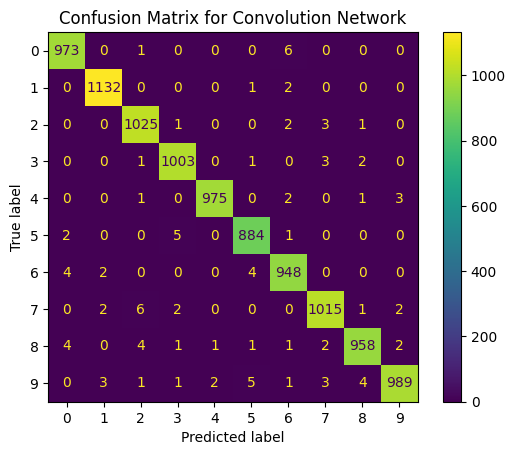

In [51]:
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix for Convolution Network')
plt.show()

## Just for Fun

I am using the model to predict some handwriten digits I wrote. 

In [19]:
images = []
for file in os.listdir('my_digits'):
    img = Image.open('my_digits/' + file).convert('L')
    img = np.asarray(img) / 255
    images.append(img) 

In [20]:
images = np.array(images)
images_expanded = np.expand_dims(images, -1)

In [21]:
images_expanded.shape

(10, 28, 28, 1)

In [22]:
predictions = conv_model.predict(images_expanded)
probabilities = tf.nn.softmax(predictions).numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [35]:
num_predicted = probabilities.argmax(axis=-1)
print('Predicted:', num_predicted)

Predicted: [8 5 4 9 1 7 6 3 2 0]


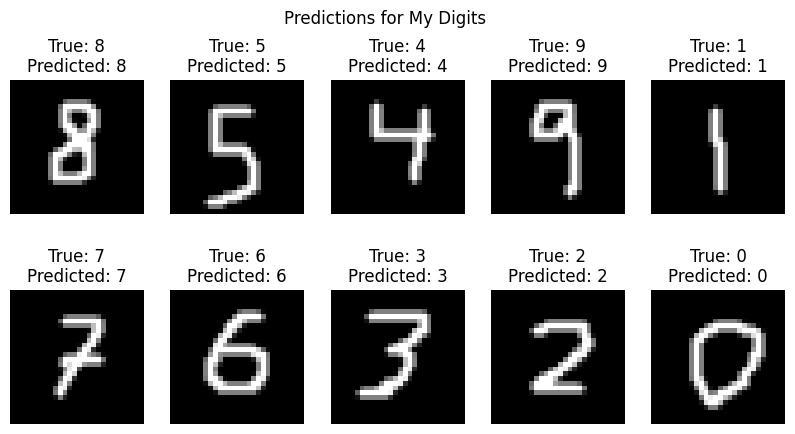

In [24]:
true_nums = [8, 5, 4, 9, 1, 7, 6, 3, 2, 0]

fig, ax = plt.subplots(figsize=(10, 5), nrows=2, ncols=5)
plt.suptitle('Predictions for My Digits')
for i in range(len(images)):
    row = i // 5
    col = i % 5
    curr_axis = ax[row][col]

    curr_axis.set_axis_off()
    curr_axis.imshow(images[i], cmap='gray')
    curr_axis.set_title('True: ' + str(true_nums[i]) + '\nPredicted: ' + str(num_predicted[i]))
    

plt.show()